# Tests

## Basic tests

### Utilisation of classes

In [1]:
from class_Path import *
file_path = "./ged docs/Queen_Eliz_II.ged"

In [2]:
graph = Graph(file_path)
path = Path(file_path)

In [3]:
#graph.get_IndivLinks_DataFrame()

In [4]:
#path.print_table('@I11259@','@I10835@')

In [5]:
path.get_dij('@I11259@','@I10835@')

[['@I11257@', 'child'], ['@I11250@', 'grandchild'], ['@I11175@', 'grandchild'], ['@I11179@', 'grandchild'], ['@I11183@', 'grandchild'], ['@I8765@', 'spouse'], ['@I8761@', 'grandparent'], ['@I8756@', 'grandparent'], ['@I8752@', 'grandparent'], ['@I8745@', 'grandparent'], ['@I8748@', 'grandparent'], ['@I2216@', 'grandparent'], ['@I10835@', 'nephew']]


[36,
 'Isabella (le) is the daughter of the nephew of Thomas, who is the grand son of the nephew of the nephew of Dorothy, who is the wife of the niece of the niece of Henry (4th Lord of Groby) de, who is the grand father of the nephew of the niece of Eva, who is the grand mother of the niece of Thomas.']

## Parameters tests

In [1]:
from class_Test import *

### Queen_Eliz_II.ged

In [2]:
# /!\ Very long : takes up to 15 minutes /!\
test = Test("./ged docs/Queen_Eliz_II.ged")

In [9]:
test.comparison_Dataframe()

,Path,Distance,Dijkstar distance,Execution time (s),Dijkstar execution time (s),Difference of execution time (s)
Individuals,,,,,,
"[@I10994@, @I8418@]",Elizabeth is the daughter of the grand daughte...,15,15,13.439204,13.241964,0.197240
"[@I2168@, @I10861@]",Tudful verch THOMAS is the grand son of the gr...,32,32,23.905815,24.028720,-0.122905
"[@I1747@, @I5112@]",Wihtred Oiscinga is the grand father of the gr...,36,36,27.139665,26.802888,0.336776
"[@I4375@, @I5711@]",Arog of BEARCUIL is the grand daughter of the ...,89,89,59.697919,58.887280,0.810639
"[@I11032@, @I4417@]",Melchi is the wife of the grand father of John...,113,113,76.832694,77.181318,-0.348624


In [10]:
test.average()

(40.20305943489075, 40.02843418121338)

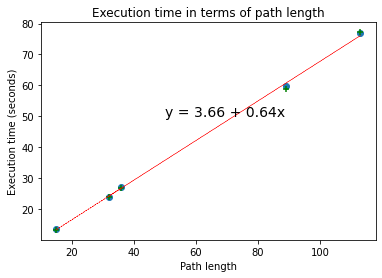

In [11]:
test.plot_Distance_Time()

In 60.0% of cases, the Dijkstra algorithm is faster.


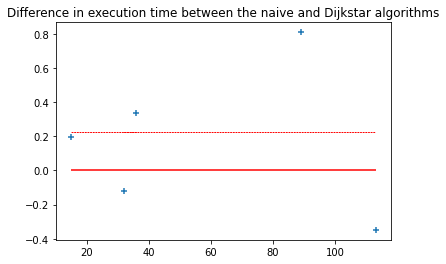

In [12]:
test.plot_difference()

### SeigneursGed.ged

In [13]:
# /!\ Very long : takes up to 15 minutes /!\
test2 = Test("./ged docs/SeigneursGed.ged")

/Users/theophiledechelotte/Documents/1A Mines/UE 22 - Ingéniérie Logicielle/Projet arbre généalogique/projet_informatique_famille/class_Graph.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2.at[f'{indiv1}',f'CHILD{N_childrens}'] = f'{indiv3}'
/Users/theophiledechelotte/Documents/1A Mines/UE 22 - Ingéniérie Logicielle/Projet arbre généalogique/projet_informatique_famille/class_Graph.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2.at[f'{indiv1}',f'CHILD{N_childrens}'] = f'{indiv3}'
/Users/theophiledechel

In [8]:
test2.comparison_Dataframe()

,Path,Distance,Dijkstar distance,Execution time (s),Dijkstar execution time (s),Difference of execution time (s)
Individuals,,,,,,
"[@101083I@, @101076I@]",Ange is the uncle of the husband of Augustine.,4,4,0.173627,0.173737,-0.000110
"[@446I@, @72890I@]",Béatrix is the father of the grand daughter of...,5,5,0.178283,0.173572,0.004711
"[@61590I@, @101129I@]",Marie Gaétane is the father of the grand daugh...,5,5,0.176165,0.218417,-0.042252
"[@29321I@, @419I@]",Jeanne Hippolyte Rose is the grand son of the ...,6,6,0.283383,0.223211,0.060172
"[@455I@, @14113I@]","Agnès is the wife of the father of Agnès, who ...",6,6,0.286050,0.285683,0.000367
